In [1]:
import pandas as pd

crashes = pd.read_csv('../data/crashes_crashes.csv')

crashes_prime_cause = crashes[(crashes['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE') & (crashes['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE')]

crashes_prime_cause_filled = crashes_prime_cause.fillna({'INTERSECTION_RELATED_I': 'N', 'NOT_RIGHT_OF_WAY_I': 
                                                         'N', 'HIT_AND_RUN_I':'N'})

crashes_prime_cause_filleddrop = crashes_prime_cause_filled.dropna(subset=['LATITUDE', 'LONGITUDE', 'INJURIES_TOTAL', 'INJURIES_FATAL', 
                                                                           'MOST_SEVERE_INJURY'])


from sklearn.cluster import KMeans

n_clusters = 30  # Number of clusters to create
X = crashes_prime_cause_filleddrop[['LONGITUDE', 'LATITUDE']]

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

# Add cluster labels to your data
cluster_labels = kmeans.labels_
crashes_prime_cause_filleddrop['GEO_KMEANS_Cluster'] = cluster_labels





crashes_prime_cause_filleddrop = crashes_prime_cause_filleddrop.drop(columns = ['CRASH_DATE_EST_I', 'DEVICE_CONDITION', 'REPORT_TYPE', 'DATE_POLICE_NOTIFIED',
                                                          'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME','BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 
                                                          'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 
                                                          'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_NO_INDICATION', 
                                                          'INJURIES_UNKNOWN', 'LOCATION', 'LANE_CNT', 'CRASH_DATE', 
                                                          'INJURIES_REPORTED_NOT_EVIDENT', 'TRAFFIC_CONTROL_DEVICE', 'INJURIES_TOTAL', 
                                                          'INJURIES_FATAL'])
crashes_prime_cause_filleddrop.info()


crashes_prime_cause_filleddrop_dummy = pd.get_dummies(crashes_prime_cause_filleddrop, columns = ['WEATHER_CONDITION', 'LIGHTING_CONDITION',
                                                                                                 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 
                                                                                                 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 
                                                                                                 'SEC_CONTRIBUTORY_CAUSE', 'ROAD_DEFECT',
                                                                                                 'MOST_SEVERE_INJURY'], drop_first=True, 
                                                                                                  dtype=int)
                                                                                                 




#binary/tertiary
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['CRASH_TYPE','INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE']:
    crashes_prime_cause_filleddrop_dummy[col] = le.fit_transform(crashes_prime_cause_filleddrop_dummy[col])


crashes_cleaned = crashes_prime_cause_filleddrop_dummy


breaking_laws_list = ['DISREGARDING TRAFFIC SIGNALS', 'DISREGARDING STOP SIGN', 'DISREGARDING ROAD MARKINGS', 
                  'DISREGARDING OTHER TRAFFIC SIGNS', 'DISREGARDING YIELD SIGN', 'FAILING TO YIELD RIGHT-OF-WAY'] 

bad_driving_list = ['DRIVING ON WRONG SIDE/WRONG WAY', 'FOLLOWING TOO CLOSELY', 'IMPROPER OVERTAKING/PASSING', 
                    'FAILING TO REDUCE SPEED TO AVOID CRASH', 'TURNING RIGHT ON RED','EXCEEDING SAFE SPEED FOR CONDITIONS',
                    'EXCEEDING AUTHORIZED SPEED LIMIT', 'IMPROPER LANE USAGE', 'PHYSICAL CONDITION OF DRIVER', 
                  'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE','IMPROPER BACKING', 'IMPROPER TURNING/NO SIGNAL']

distraction_list = ['TEXTING', 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)', 
                    'DISTRACTION - FROM INSIDE VEHICLE','CELL PHONE USE OTHER THAN TEXTING']

drinking_list = ['OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)']

road_list = ['DISTRACTION - FROM OUTSIDE VEHICLE', 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 'ROAD CONSTRUCTION/MAINTENANCE', 'EQUIPMENT - VEHICLE CONDITION', 
             'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 'WEATHER']

other_list= ['PASSING STOPPED SCHOOL BUS', 'OBSTRUCTED CROSSWALKS', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
             'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT', 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST', 'ANIMAL', 'TURNING RIGHT ON RED', 
             'RELATED TO BUS STOP'] 

binning_list = [breaking_laws_list, bad_driving_list, distraction_list, drinking_list, road_list, other_list]
value_list = ['BREAKING LAW', 'BAD DRIVING', 'DISTRACTION INSIDE VEHICLE', 'DRINKING/DRUGS', 'OUTSIDE FACTORS', 'OTHER']


for group, value in zip(binning_list, value_list):
    crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'] = crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'].replace(to_replace = group, value = value)

crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bt/mf607s9n0xs6sr08g8c44w9c0000gn/T/ipykernel_23471/2118013173.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_prime_cause_filleddrop['GEO_KMEANS_Cluster'] = cluster_labels


<class 'pandas.core.frame.DataFrame'>
Index: 442382 entries, 2 to 798905
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          442382 non-null  object 
 1   POSTED_SPEED_LIMIT       442382 non-null  int64  
 2   WEATHER_CONDITION        442382 non-null  object 
 3   LIGHTING_CONDITION       442382 non-null  object 
 4   FIRST_CRASH_TYPE         442382 non-null  object 
 5   TRAFFICWAY_TYPE          442382 non-null  object 
 6   ALIGNMENT                442382 non-null  object 
 7   ROADWAY_SURFACE_COND     442382 non-null  object 
 8   ROAD_DEFECT              442382 non-null  object 
 9   CRASH_TYPE               442382 non-null  object 
 10  INTERSECTION_RELATED_I   442382 non-null  object 
 11  NOT_RIGHT_OF_WAY_I       442382 non-null  object 
 12  HIT_AND_RUN_I            442382 non-null  object 
 13  DAMAGE                   442382 non-null  object 
 14  PRIM_CONT

PRIM_CONTRIBUTORY_CAUSE
BAD DRIVING                   0.622616
BREAKING LAW                  0.257843
OUTSIDE FACTORS               0.063773
DRINKING/DRUGS                0.033166
DISTRACTION INSIDE VEHICLE    0.016300
OTHER                         0.006302
Name: proportion, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 442382 entries, 2 to 798905
Columns: 127 entries, CRASH_RECORD_ID to MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT
dtypes: float64(2), int32(1), int64(122), object(2)
memory usage: 430.3+ MB


In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

le = LabelEncoder()

crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'] = le.fit_transform(crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'])

X = crashes_cleaned.drop(columns = ['CRASH_RECORD_ID', 'PRIM_CONTRIBUTORY_CAUSE', 'LONGITUDE', 'LATITUDE', 
                                    'WEATHER_CONDITION_CLEAR', 'ALIGNMENT_STRAIGHT AND LEVEL', 'ROADWAY_SURFACE_COND_SNOW OR SLUSH', 
                                    'ROADWAY_SURFACE_COND_WET', 'ROAD_DEFECT_UNKNOWN', 'MOST_SEVERE_INJURY_NO INDICATION OF INJURY'])
y = crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
ss = StandardScaler()

ss.fit(X_train_resampled)

X_train_scaled = ss.transform(X_train_resampled)
X_test_scaled = ss.transform(X_test)


In [5]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)

model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, log_loss, f1_score, ConfusionMatrixDisplay, roc_auc_score

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
#auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.7038862164996926
Precision: [0.76930719 0.65232427 0.15281501 0.25991689 0.2625     0.44958616]
Recall: [0.82433142 0.62517443 0.09547739 0.18559482 0.19496021 0.33652492]
F1 score: [0.79586938 0.63846085 0.11752577 0.2165565  0.22374429 0.38492511]


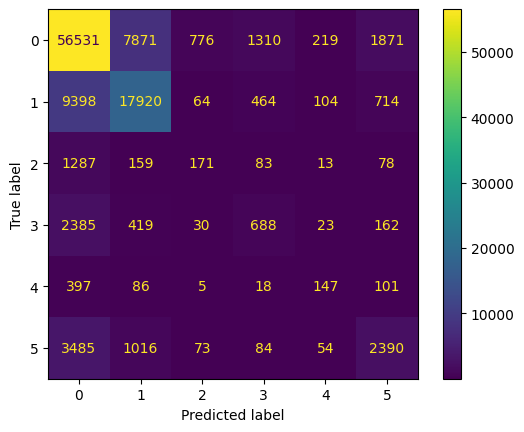

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cf, display_labels=None)

disp.plot()

In [9]:
coefficients = model.coef_

# Get the intercepts for each class
intercepts = model.intercept_

class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame(coefficients, columns=crashes_cleaned.drop(columns = ['CRASH_RECORD_ID', 'PRIM_CONTRIBUTORY_CAUSE', 'LONGITUDE', 'LATITUDE', 
                                    'WEATHER_CONDITION_CLEAR', 'ALIGNMENT_STRAIGHT AND LEVEL', 'ROADWAY_SURFACE_COND_SNOW OR SLUSH', 
                                    'ROADWAY_SURFACE_COND_WET', 'ROAD_DEFECT_UNKNOWN', 'MOST_SEVERE_INJURY_NO INDICATION OF INJURY']).columns, index=class_names)

# Display the coefficients
print("Coefficients:")
print(coefficients_df)

# Create a DataFrame to display the intercepts
intercepts_df = pd.DataFrame(intercepts, columns=['Intercept'], index=class_names)

# Display the intercepts
print("\nIntercepts:")
print(intercepts_df)



Coefficients:
         POSTED_SPEED_LIMIT  CRASH_TYPE  INTERSECTION_RELATED_I  \
Class 0           -0.091137    0.585970                0.324772   
Class 1           -0.089349    0.205435                0.485713   
Class 2            0.028598   -0.252600               -0.207034   
Class 3           -0.048884   -0.338630               -0.237313   
Class 4            0.208866   -0.123794               -0.402696   
Class 5           -0.008094   -0.076381                0.036559   

         NOT_RIGHT_OF_WAY_I  HIT_AND_RUN_I    DAMAGE  NUM_UNITS  CRASH_HOUR  \
Class 0            0.069208       0.388707  0.140821   0.201637    0.044557   
Class 1            0.010042       0.253940  0.168847   0.299383    0.052665   
Class 2           -0.021274      -0.552516 -0.064869   0.059136   -0.015921   
Class 3            0.011606       0.722840  0.037373   0.148468   -0.036344   
Class 4           -0.046041      -0.354398 -0.229071  -0.492411   -0.015188   
Class 5           -0.023541      -0.458572

In [11]:


threshold = 0.13865255

col_names = list(coefficients_df.columns[coefficients_df.max() > threshold])

filtered_coef_df = coefficients_df[col_names]
filtered_coef_df

col_names.append('PRIM_CONTRIBUTORY_CAUSE')

crashes_cleaned_2 = crashes_cleaned[col_names]
crashes_cleaned_2


,POSTED_SPEED_LIMIT,CRASH_TYPE,INTERSECTION_RELATED_I,HIT_AND_RUN_I,DAMAGE,NUM_UNITS,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SNOW,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAYLIGHT,...,SEC_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",SEC_CONTRIBUTORY_CAUSE_WEATHER,ROAD_DEFECT_NO DEFECTS,"ROAD_DEFECT_RUT, HOLES",MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT",PRIM_CONTRIBUTORY_CAUSE
2,30,1,0,1,2,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
46,30,1,0,1,2,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
56,30,0,0,0,2,3,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
63,30,1,0,1,2,2,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
74,30,1,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798899,30,1,0,1,0,2,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
798901,30,0,0,0,2,2,0,0,0,1,...,0,0,0,0,0,1,0,0,1,3
798902,30,1,0,1,2,2,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
798904,30,1,0,1,1,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [14]:
X2 = crashes_cleaned_2.drop(columns = ['PRIM_CONTRIBUTORY_CAUSE'])
y2 = crashes_cleaned_2['PRIM_CONTRIBUTORY_CAUSE']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)
smote2 = SMOTE()
X2_train_resampled, y2_train_resampled = smote.fit_resample(X2_train, y2_train)
ss2 = StandardScaler()

ss2.fit(X2_train_resampled)

X2_train_scaled = ss2.transform(X2_train_resampled)
X2_test_scaled = ss2.transform(X2_test)


In [15]:
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)

model2.fit(X2_train_scaled, y2_train_resampled)

y2_pred = model2.predict(X2_test_scaled)
accuracy2 = accuracy_score(y2_test, y2_pred)
precision2 = precision_score(y2_test, y2_pred, average=None)
recall2 = recall_score(y2_test, y2_pred, average=None)
f12 = f1_score(y2_test, y2_pred, average=None)
#auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')

print('Accuracy:', accuracy2)
print('Precision:', precision2)
print('Recall:', recall2)
print('F1 score:', f12)


Accuracy: 0.5035986834966907
Precision: [0.80641883 0.56693343 0.05149996 0.17156325 0.03788904 0.34384825]
Recall: [0.43697917 0.69636754 0.38913282 0.42619826 0.3204578  0.46744551]
F1 score: [0.56681486 0.62501976 0.09096158 0.24464593 0.06776584 0.39623211]


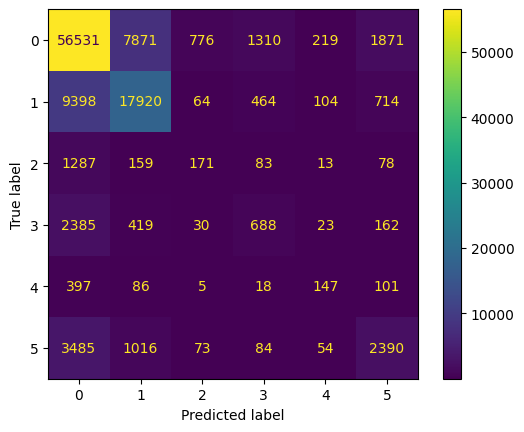

In [16]:
cf2 = confusion_matrix(y2_test, y2_pred)
disp2 = ConfusionMatrixDisplay(cf2, display_labels=None)

disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV






# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [100, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', **best_params)
final_model.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
test_accuracy = final_model.score(X_test, y_test)
